In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 10

In [3]:
# Load data
df = pd.read_csv("GroupProjectDataSet.csv", sep=',')
print('Shape of data frame:', df.shape)
df.head(10)

Shape of data frame: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Class
0,530.0,20.0,RL,NaN,32668.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Alloca,2.0
1,492.0,50.0,RL,79.0,9490.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,NaN,0.0,8.0,2006.0,WD,Normal,1.0
2,460.0,50.0,RL,NaN,7015.0,Pave,NaN,IR1,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,1.0
3,280.0,60.0,RL,83.0,10005.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2008.0,WD,Normal,1.0
4,656.0,160.0,RM,21.0,1680.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2010.0,WD,Family,0.0
5,1014.0,30.0,RM,60.0,7200.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6.0,2009.0,WD,Normal,0.0
6,1404.0,20.0,RL,49.0,15256.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,2.0
7,602.0,50.0,RM,50.0,9000.0,Pave,NaN,Reg,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,12.0,2007.0,WD,Normal,1.0
8,1183.0,60.0,RL,160.0,15623.0,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,0.0,7.0,2007.0,WD,Abnorml,4.0
9,688.0,160.0,FV,NaN,5105.0,Pave,NaN,IR2,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Normal,1.0


In [4]:
# Filling missing values for variables where appropriate

df["PoolQC"] = df["PoolQC"].fillna(value = "None")
df["MiscFeature"] = df["MiscFeature"].fillna(value = "None")
df["Alley"] = df["Alley"].fillna(value = "None")
df["Fence"] = df["Fence"].fillna(value = "None")
df["FireplaceQu"] = df["FireplaceQu"].fillna(value = "None")
df["GarageCond"] = df["GarageCond"].fillna(value = "None")
df["GarageType"] = df["GarageType"].fillna(value = "None")
df["GarageFinish"] = df["GarageFinish"].fillna(value = "None")
df["GarageQual"] = df["GarageQual"].fillna(value = "None")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(value = "None")
df["BsmtExposure"] = df["BsmtExposure"].fillna(value = "None")
df["BsmtQual"] = df["BsmtQual"].fillna(value = "None")
df["BsmtCond"] = df["BsmtCond"].fillna(value = "None")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(value = "None")

<AxesSubplot:>

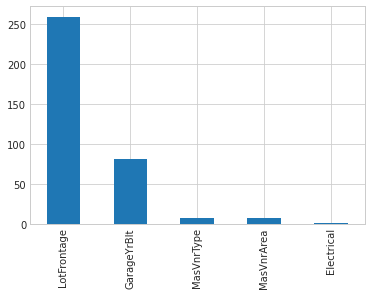

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.plot.bar()

In [6]:
# Percentage of missing values for the variables

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Nr. of missing values', 'Share'])
missing_data.head(5)

,Nr. of missing values,Share
LotFrontage,259.0,0.177397
GarageYrBlt,81.0,0.055479
MasVnrType,8.0,0.005479
MasVnrArea,8.0,0.005479
Electrical,1.0,0.000685


In [7]:
#####Dealing with Categorical Features (Encoding Categorical Variables) / Splitting Into X and y

# Numerical variables that should be handled as categorical variables
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})
df = df.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

In [8]:
# Assign response to y
y = df.iloc[:, -1]

# Factorize categorical values, assign output to X
# create (multiple) dummy variables for a categorical variable
# panda way
X = pd.get_dummies(df.iloc[:, :-1])
X.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,530.0,NaN,32668.0,6.0,3.0,1957.0,1975.0,NaN,1219.0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,492.0,79.0,9490.0,6.0,7.0,1941.0,1950.0,0.0,403.0,165.0,...,0,0,0,1,0,0,0,0,1,0
2,460.0,NaN,7015.0,5.0,4.0,1950.0,1950.0,161.0,185.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,280.0,83.0,10005.0,7.0,5.0,1977.0,1977.0,299.0,392.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,656.0,21.0,1680.0,6.0,5.0,1971.0,1971.0,381.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


<AxesSubplot:>

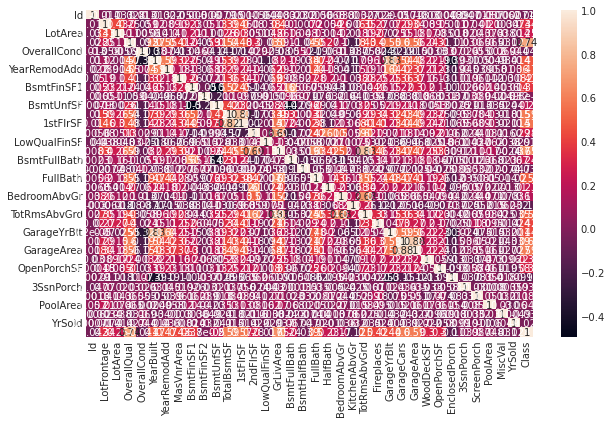

In [11]:
## Feature Selection##
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Compute the correlation matrix
corr = df.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True)

In [9]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Sort the correlations with respect to 'Class'
corr_with_class = corr_matrix['Class'].sort_values(ascending=False)

# Print the correlations
print(corr_with_class)

# Select the top 10 features with the highest correlation
top_features = corr_with_class.nlargest(10).index

# Print the top features
print(top_features)



Class            1.000000
OverallQual      0.742574
GrLivArea        0.651674
GarageCars       0.595107
GarageArea       0.594322
TotalBsmtSF      0.586828
1stFlrSF         0.570644
TotRmsAbvGrd     0.502809
FullBath         0.495387
YearRemodAdd     0.474712
YearBuilt        0.473457
GarageYrBlt      0.442822
MasVnrArea       0.425827
Fireplaces       0.417341
BsmtFinSF1       0.369270
LotFrontage      0.339814
OpenPorchSF      0.302405
WoodDeckSF       0.301702
2ndFlrSF         0.280965
LotArea          0.247795
BsmtFullBath     0.235471
HalfBath         0.232521
BsmtUnfSF        0.201491
BedroomAbvGr     0.172087
ScreenPorch      0.087483
PoolArea         0.047851
3SsnPorch        0.039062
BsmtFinSF2      -0.000068
LowQualFinSF    -0.016682
YrSold          -0.028048
MiscVal         -0.030503
BsmtHalfBath    -0.039215
OverallCond     -0.040961
Id              -0.041634
EnclosedPorch   -0.110935
KitchenAbvGr    -0.122189
Name: Class, dtype: float64
Index(['Class', 'OverallQual', 'GrLi

In [10]:
####Partitioning of the Data Set Into Train and Test Set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    stratify=y)

In [27]:
#######KNN#######

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_df = pd.DataFrame(data=X_train, columns=X.columns)
train_df['Class'] = y_train

test_df = pd.DataFrame(data=X_test, columns=X.columns)
test_df['Class'] = y_test

X_train = train_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y_train = train_df['Class']

# Initialize the KNN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Use the trained KNN model to make predictions on the test data
X_test = test_df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y_test = test_df['Class']
y_pred = knn.predict(X_test)

# Compute the accuracy of the KNN model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report

# Compute the classification report for the KNN model on the test data
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


Accuracy: 0.7328767123287672
              precision    recall  f1-score   support

         0.0       0.70      0.55      0.62        29
         1.0       0.83      0.86      0.84       179
         2.0       0.55      0.58      0.56        59
         3.0       0.42      0.44      0.43        18
         4.0       1.00      0.29      0.44         7

    accuracy                           0.73       292
   macro avg       0.70      0.54      0.58       292
weighted avg       0.74      0.73      0.73       292



In [18]:
#The classification report shows the precision, recall, F1-score, and support for each of the five classes in the dataset. The precision for class 0 is 0.71, which means that 71% of the predicted values for this class were actually correct. The recall for class 0 is 0.32, which means that only 32% of the actual values for this class were correctly identified. The F1-score for class 0 is 0.44, which is the harmonic mean of precision and recall for this class. The support for class 0 is 37, which means that there are 37 instances of this class in the test data.
#The same metrics are computed for the other four classes, and the overall accuracy of the model on the test data is 0.72. The macro and weighted averages of the precision, recall, and F1-score provide additional information about the overall performance of the model, with macro averaging giving equal weight to each class and weighted averaging taking into account the number of instances in each class.

In [32]:
###SMOTE####
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the number of samples before and after SMOTE
print("Number of samples before SMOTE:", len(X_train))
print("Number of samples after SMOTE:", len(X_train_smote))

# Train a KNN classifier on the oversampled data
knn_smote = KNeighborsClassifier(n_neighbors=20)
knn_smote.fit(X_train_smote, y_train_smote)

# Predict the test set using the KNN classifier trained on the oversampled data
y_pred_smote = knn_smote.predict(X_test)

# Compute the accuracy of the KNN model with SMOTE on the test data
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy with SMOTE:", accuracy_smote)

# Compute the classification report for the KNN model with SMOTE on the test data
report_smote = classification_report(y_test, y_pred_smote)

# Print the classification report
print(report_smote)


Number of samples before SMOTE: 1022
Number of samples after SMOTE: 3185
Accuracy with SMOTE: 0.6210045662100456
              precision    recall  f1-score   support

         0.0       0.33      0.78      0.46        37
         1.0       0.90      0.56      0.69       273
         2.0       0.54      0.78      0.64        94
         3.0       0.48      0.46      0.47        26
         4.0       0.22      0.50      0.31         8

    accuracy                           0.62       438
   macro avg       0.49      0.62      0.51       438
weighted avg       0.74      0.62      0.64       438



In [33]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the random oversampler with random_state=0
ros = RandomOverSampler(random_state=0)

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the KNN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the KNN model on the resampled training data
knn.fit(X_train_resampled, y_train_resampled)

# Use the trained KNN model to make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the KNN model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with RandomOverSampler:", accuracy)

# Compute the classification report for the KNN model on the test data
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


Accuracy with RandomOverSampler: 0.589041095890411
              precision    recall  f1-score   support

         0.0       0.29      0.78      0.42        37
         1.0       0.87      0.53      0.66       273
         2.0       0.55      0.71      0.62        94
         3.0       0.34      0.46      0.39        26
         4.0       0.31      0.62      0.42         8

    accuracy                           0.59       438
   macro avg       0.47      0.62      0.50       438
weighted avg       0.71      0.59      0.61       438



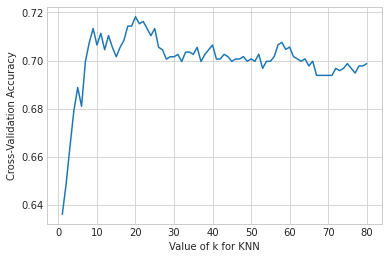

The best value of k is: 20


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of values for k
k_range = range(1, 81)

# Create an empty list to store the cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the cross-validation scores as a function of k
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, cv_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

# Select the best value of k
best_k = np.argmax(cv_scores) + 1
print("The best value of k is:", best_k)


In [49]:
#####LDA#####

In [40]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Feature-Matrix X und Zielvariable Y auswählen
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
Y = df['Class']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# LDA-Modell erstellen und anpassen
lda = LDA(solver='lsqr')
lda.fit(X_train, y_train)

# Vorhersagen auf Testdaten machen
y_pred = lda.predict(X_test)

# Leistungsmaße berechnen
print('default-rate: {0: .4f}'.format(np.sum(y_test)/len(y_test)))
print('accuracy:     {0: .4f}'.format(lda.score(X_test, y_test)))
print('error-rate:   {0: .4f}'.format(1-lda.score(X_test, y_test)))
print('F1-Score:     {0: .4f}'.format(metrics.f1_score(y_test, y_pred, average='macro')))

# Konfusionsmatrix ausgeben
print(metrics.confusion_matrix(y_test, y_pred))


default-rate:  1.2979
accuracy:      0.7945
error-rate:    0.2055
F1-Score:      0.6587
[[ 16  13   0   0   0]
 [  3 166  10   0   0]
 [  0  18  40   1   0]
 [  0   0  11   7   0]
 [  0   0   1   3   3]]


In [34]:
###SMOTE###
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Feature-Matrix X und Zielvariable Y auswählen
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
Y = df['Class']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Apply SMOTE to training data
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# LDA-Modell erstellen und anpassen
lda = LDA(solver='lsqr')
lda.fit(X_train_res, y_train_res)

# Vorhersagen auf Testdaten machen
y_pred = lda.predict(X_test)

# Leistungsmaße berechnen
print('default-rate: {0: .4f}'.format(np.sum(y_test)/len(y_test)))
print('accuracy:     {0: .4f}'.format(lda.score(X_test, y_test)))
print('error-rate:   {0: .4f}'.format(1-lda.score(X_test, y_test)))
print('F1-Score:     {0: .4f}'.format(metrics.f1_score(y_test, y_pred, average='macro')))

# Konfusionsmatrix ausgeben
print(metrics.confusion_matrix(y_test, y_pred))


default-rate:  1.2979
accuracy:      0.6267
error-rate:    0.3733
F1-Score:      0.6334
[[25  4  0  0  0]
 [52 98 28  1  0]
 [ 0  8 42  9  0]
 [ 0  0  4 12  2]
 [ 0  0  0  1  6]]


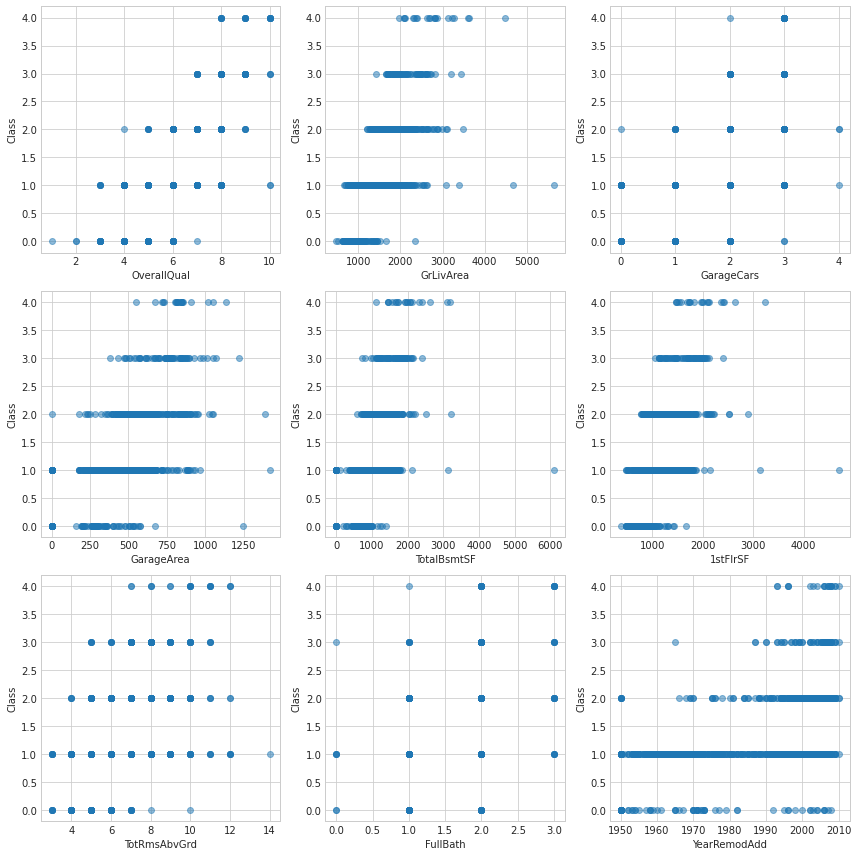

In [33]:
import matplotlib.pyplot as plt

# Erstellen von Scatterplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axs = axs.flatten()

# Entfernen Sie 'Class' aus den Features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']
X_train_no_class = X_train[features]

for i, feature in enumerate(features):
    axs[i].scatter(X_train_no_class[feature], y_train, alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Class')

plt.tight_layout()
plt.show()


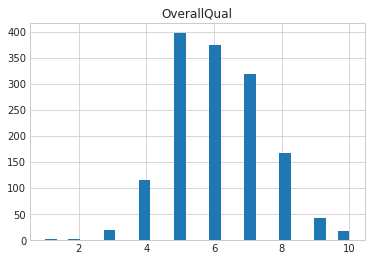

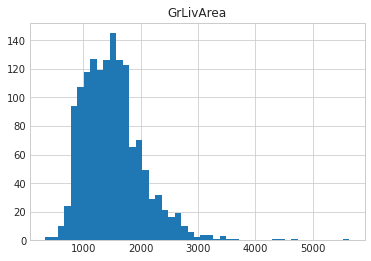

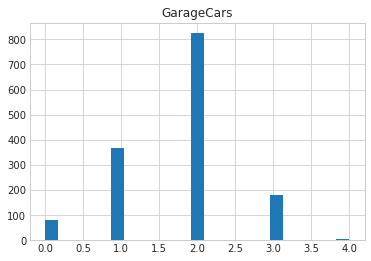

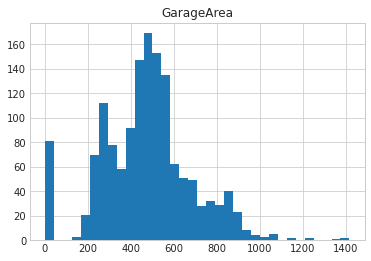

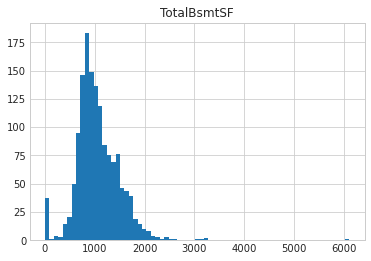

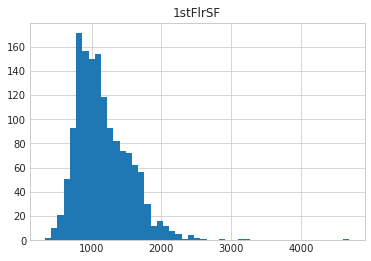

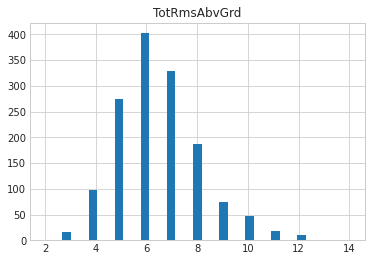

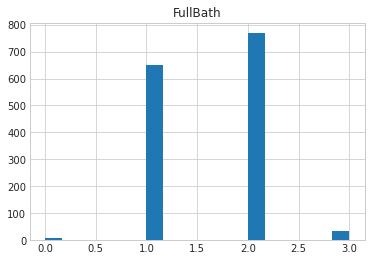

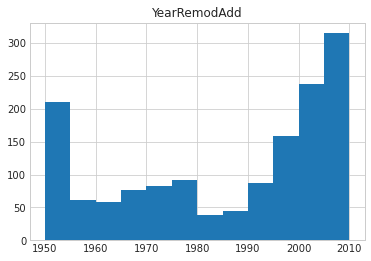

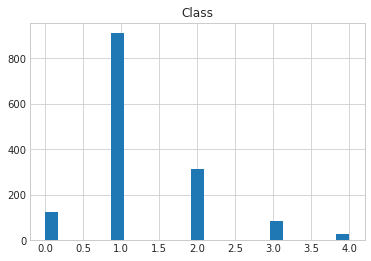

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Define features and target variable
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']
target = 'Class'

# Create histograms for each feature
for feature in features:
    plt.hist(df[feature], bins='auto')
    plt.title(feature)
    plt.show()

# Create histogram for target variable
plt.hist(df[target], bins='auto')
plt.title(target)
plt.show()


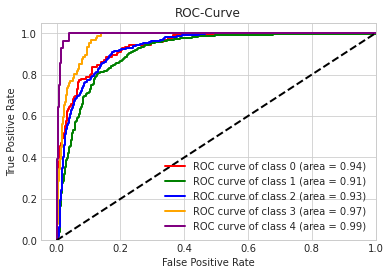

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define features and target variable
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y = df['Class']

# Create LDA object and run classifier
lda = LDA(solver='lsqr')
lda.fit(X, y)

# Predict probabilities for each class
y_prob = lda.predict_proba(X)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(set(y))):
    fpr[i], tpr[i], _ = roc_curve(y, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, color in zip(range(len(set(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")
plt.show()


In [40]:
####QDA

import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Feature-Matrix X und Zielvariable Y auswählen
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
Y = df['Class']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# QDA-Modell erstellen und anpassen
qda = QDA()
qda.fit(X_train, y_train)

# Vorhersagen auf Testdaten machen
y_pred = qda.predict(X_test)

# Leistungsmaße berechnen
print('default-rate: {0: .4f}'.format(np.sum(y_test)/len(y_test)))
print('score:        {0: .4f}'.format(qda.score(X_test, y_test)))
print('error-rate:   {0: .4f}'.format(1-qda.score(X_test, y_test)))

# Konfusionsmatrix ausgeben
print(metrics.confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


default-rate:  1.2979
score:         0.7637
error-rate:    0.2363
[[ 18  11   0   0   0]
 [ 12 148  19   0   0]
 [  0  14  41   4   0]
 [  0   0   7  10   1]
 [  0   0   0   1   6]]
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61        29
         1.0       0.86      0.83      0.84       179
         2.0       0.61      0.69      0.65        59
         3.0       0.67      0.56      0.61        18
         4.0       0.86      0.86      0.86         7

    accuracy                           0.76       292
   macro avg       0.72      0.71      0.71       292
weighted avg       0.77      0.76      0.77       292



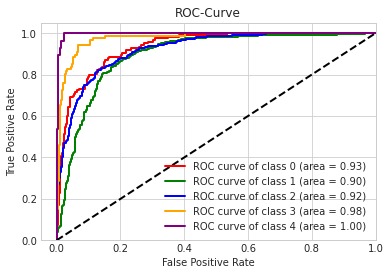

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Define features and target variable
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd']]
y = df['Class']

# Create QDA object and run classifier
qda = QDA()
qda.fit(X, y)

# Predict probabilities for each class
y_prob = qda.predict_proba(X)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(set(y))):
    fpr[i], tpr[i], _ = roc_curve(y, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, color in zip(range(len(set(y))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")
plt.show()
